In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [26]:
df = pd.read_csv('/content/drive/My Drive/Github/Airbnb/train.csv')

In [ ]:
df.head()

# Clean Data

In [ ]:
df.isnull().sum()

In [27]:
df['log_price']=df['log_price'].apply(lambda x: np.exp(x)) #Change Log Price to Linear
df['bathrooms'].fillna(0,inplace=True) # Replace null values with 0
df['bedrooms'].fillna(0,inplace=True) # Replace null values with 0
df['beds'].fillna(0,inplace=True) # Replace null values with 0
df['host_identity_verified'].fillna("f",inplace=True) # Replace null values with False
df['host_has_profile_pic'].fillna("f",inplace=True) # Replace null values with False
df.drop(columns='zipcode',inplace=True) # Remove unneeded columns
df =df[df['first_review'].notna()] #Clean room without review
df =df[df['review_scores_rating'].notna()] #Clean room without review
df['first_review'] = df['first_review'].astype('datetime64[ns]') #Change data type of review

In [ ]:
df['review_scores_rating'].value_counts()

# The Growth of Airbnb from 2008 - 2017

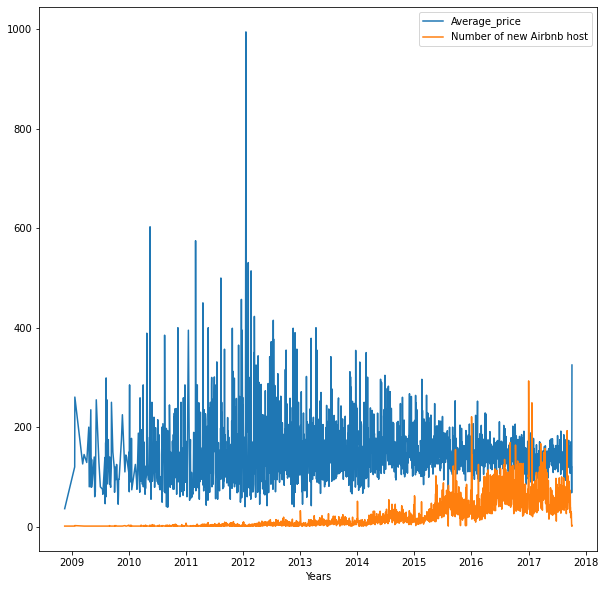

In [20]:
#@title Line Chart
df_bytime=df[['first_review','log_price']]
df_bytime_mean = df_bytime.groupby('first_review').mean()[['log_price']]
df_bytime_host = df_bytime.groupby('first_review').count()[['log_price']]
plt.figure(figsize=(10,10))
plt.plot(df_bytime_mean.index,'log_price',data=df_bytime_mean, label='Average_price')
plt.plot(df_bytime_host.index,'log_price',data=df_bytime_host, label='Number of new Airbnb host')
plt.xlabel('Years')
plt.legend()
plt.show()

# Importance of Host Profile

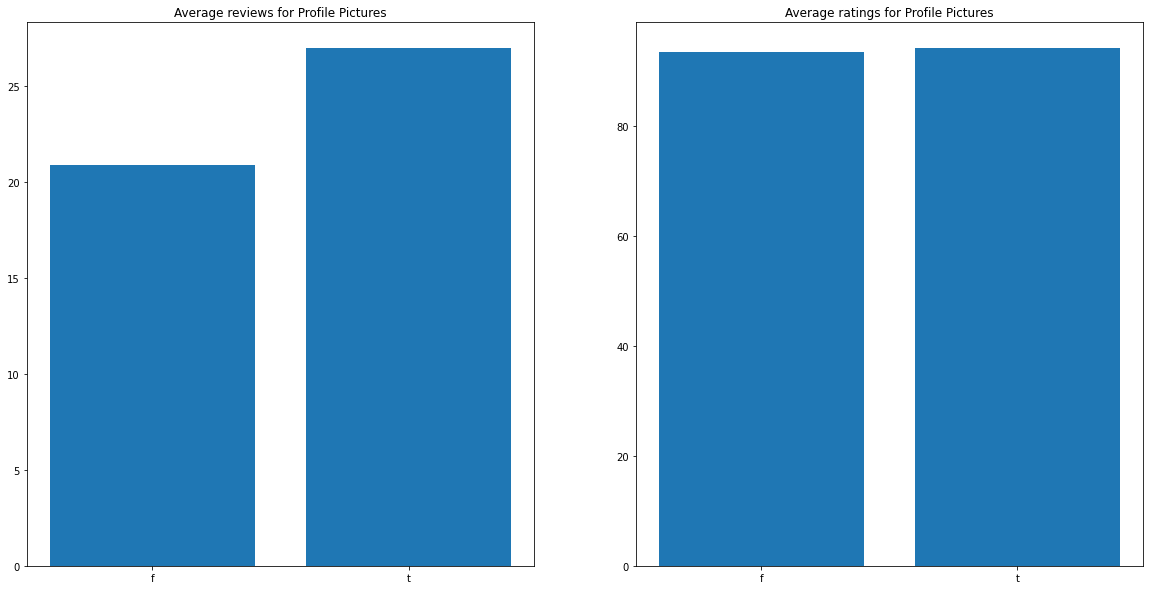

In [57]:
#@title Average Reviews, Ratings  
df_host = df[['host_has_profile_pic','host_identity_verified','number_of_reviews','review_scores_rating']]
df_host_pic = df_host.groupby('host_has_profile_pic')[['number_of_reviews','review_scores_rating']].mean()
df_host_veri = df_host.groupby('host_has_profile_pic')[['review_scores_rating']].mean()
width = 0.35 
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Average reviews for Profile Pictures')
plt.bar(df_host_pic.index,'number_of_reviews',data=df_host_pic)
plt.subplot(1,2,2)
plt.title('Average ratings for Profile Pictures')
plt.bar(df_host_pic.index,'review_scores_rating',data=df_host_pic)
plt.show()

# Word Cloud

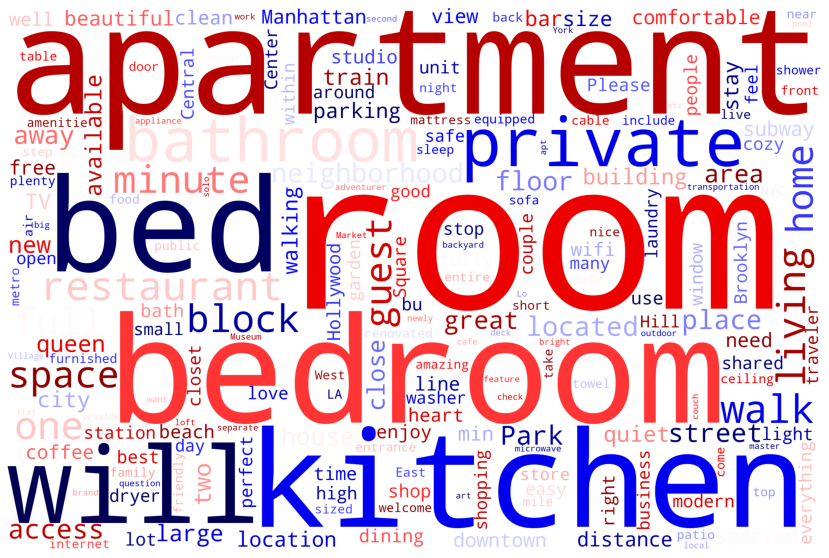

In [74]:
#@title Most Used Words in Description
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Combine all Description
df_wc = df['description']
a= ""
for i in df_wc:
  a += i
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(15, 10))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', 
                      colormap='seismic', collocations=False, stopwords = STOPWORDS).generate(a)
# Plot
plot_cloud(wordcloud)

# Users

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


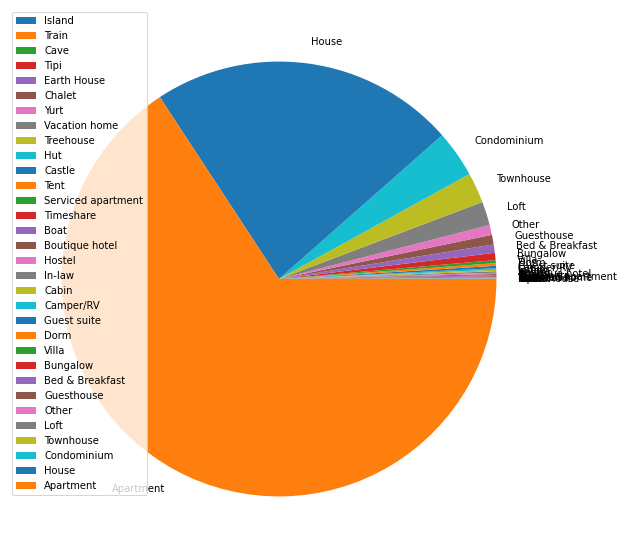

In [105]:
#@title Most Popular Property Type
df_prop = df[['property_type','id','log_price']]
df_prop = df_prop.groupby('property_type')[['id']].count()
df_prop = df_prop.sort_values('id')
plt.figure(figsize=(10,10))
plt.pie(df_prop,labels=df_prop.index)
plt.legend()
plt.show()


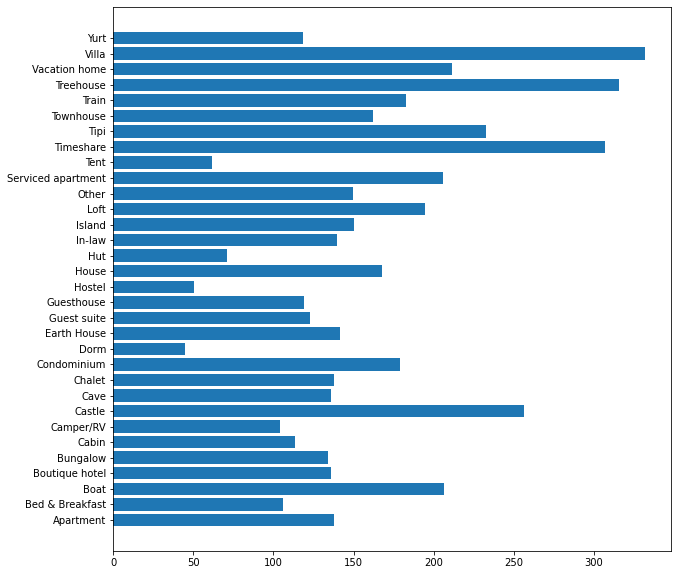

In [111]:
#@title Average Price of each Property  
df_prop = df[['property_type','id','log_price']]
df_price = df_prop.groupby('property_type')[['log_price']].mean()
plt.figure(figsize=(10,10))
plt.barh(df_price.index,'log_price',data=df_price)
plt.show()


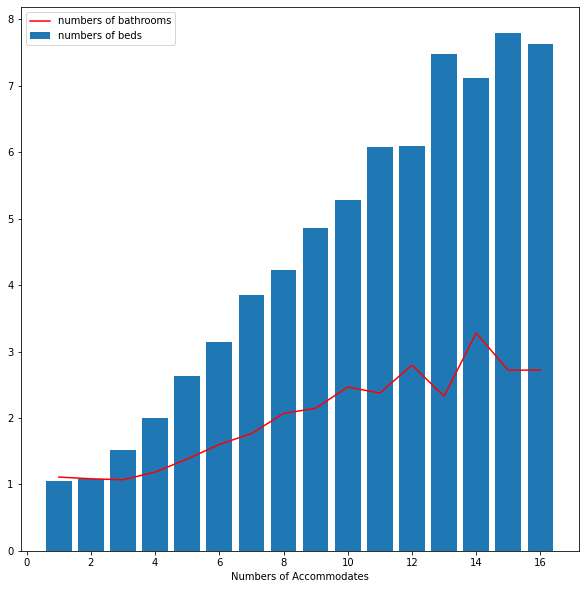

In [129]:
#@title Average numbers of bathrooms and beds 
df_b = df[['beds','bathrooms','log_price','accommodates']]
df_b = df_b.groupby('accommodates')[['beds','bathrooms']].mean()
plt.figure(figsize=(10,10))
plt.bar(df_b.index,'beds',data=df_b, label='numbers of beds')
plt.plot(df_b.index, 'bathrooms', data=df_b, color='red', label='numbers of bathrooms')
plt.xlabel('Numbers of Accommodates')
plt.legend()
plt.show()